<a href="https://colab.research.google.com/github/ibonetc/Data_Analytics/blob/main/NLP/Embedding_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding: Ejemplo de clasificación

## Carga de datos

In [3]:
import pandas as pd

In [4]:
url='https://drive.google.com/file/d/125x5b53lSHl5NBbKOcOPz9uxFQolXCEy/view?usp=sharing'
url='https://drive.google.com/uc?id='+ url.split('/')[-2]
url

'https://drive.google.com/uc?id=125x5b53lSHl5NBbKOcOPz9uxFQolXCEy'

In [5]:
df=pd.read_csv(url)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [43]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Procesar el texto: Limpiar, tokenizar y quitar stopwords

In [7]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
df['review_clean'] = df['review'].apply(lambda x: re.sub(r'<.*?>', ' ', x))
df['review_clean'] = df['review_clean'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [9]:
df

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,I'm going to have to disagree with the previou...


In [10]:
def process_text(text):
  tokens=word_tokenize(text.lower())
  tokens=[token for token in tokens if token not in stop_words]
  return tokens

In [11]:
t=df['review_clean'][0]
t

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows

In [12]:
print(process_text(t))

['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', "'ll", 'hooked', '.', 'right', ',', 'exactly', 'happened', '.', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', ',', 'set', 'right', 'word', 'go', '.', 'trust', ',', 'show', 'faint', 'hearted', 'timid', '.', 'show', 'pulls', 'punches', 'regards', 'drugs', ',', 'sex', 'violence', '.', 'hardcore', ',', 'classic', 'use', 'word', '.', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'focuses', 'mainly', 'emerald', 'city', ',', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', ',', 'privacy', 'high', 'agenda', '.', 'em', 'city', 'home', 'many', '..', 'aryans', ',', 'muslims', ',', 'gangstas', ',', 'latinos', ',', 'christians', ',', 'italians', ',', 'irish', '....', 'scuffles', ',', 'death', 'stares', ',', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', '.', 'would', 'say', 'main', 'appe

In [13]:
df['tokens']=df['review_clean'].apply(lambda x: process_text(x))

In [14]:
df

,review,sentiment,review_clean,tokens
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,"[wonderful, little, production, ., filming, te..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,"[basically, 's, family, little, boy, (, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, 's, ``, love, time, money, ''..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...,"[thought, movie, right, good, job, ., n't, cre..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot, bad dialogue, bad acting, idiotic di...","[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,I'm going to have to disagree with the previou...,"['m, going, disagree, previous, comment, side,..."


In [15]:
X_text=[txt for txt in df['tokens']]
labels=[txt for txt in df['sentiment']]

In [16]:
print(X_text[0])

['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', "'ll", 'hooked', '.', 'right', ',', 'exactly', 'happened', '.', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', ',', 'set', 'right', 'word', 'go', '.', 'trust', ',', 'show', 'faint', 'hearted', 'timid', '.', 'show', 'pulls', 'punches', 'regards', 'drugs', ',', 'sex', 'violence', '.', 'hardcore', ',', 'classic', 'use', 'word', '.', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'focuses', 'mainly', 'emerald', 'city', ',', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', ',', 'privacy', 'high', 'agenda', '.', 'em', 'city', 'home', 'many', '..', 'aryans', ',', 'muslims', ',', 'gangstas', ',', 'latinos', ',', 'christians', ',', 'italians', ',', 'irish', '....', 'scuffles', ',', 'death', 'stares', ',', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', '.', 'would', 'say', 'main', 'appe

In [17]:
texts=[' '.join(text) for text in X_text]

In [18]:
texts[0]

"one reviewers mentioned watching 1 oz episode 'll hooked . right , exactly happened . first thing struck oz brutality unflinching scenes violence , set right word go . trust , show faint hearted timid . show pulls punches regards drugs , sex violence . hardcore , classic use word . called oz nickname given oswald maximum security state penitentary . focuses mainly emerald city , experimental section prison cells glass fronts face inwards , privacy high agenda . em city home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgy dealings shady agreements never far away . would say main appeal show due fact goes shows would n't dare . forget pretty pictures painted mainstream audiences , forget charm , forget romance ... oz n't mess around . first episode ever saw struck nasty surreal , could n't say ready , watched , developed taste oz , got accustomed high levels graphic violence . violence , injustice ( crooked guards 'll so

In [19]:
print(len(texts))
print(len(labels))

50000
50000


In [20]:
import string
from string import punctuation

In [21]:
punt=list(punctuation)
texts_punt=[''.join([char for char in text if char not in punt]) for text in texts]

In [22]:
texts_punt[0]

'one reviewers mentioned watching 1 oz episode ll hooked  right  exactly happened  first thing struck oz brutality unflinching scenes violence  set right word go  trust  show faint hearted timid  show pulls punches regards drugs  sex violence  hardcore  classic use word  called oz nickname given oswald maximum security state penitentary  focuses mainly emerald city  experimental section prison cells glass fronts face inwards  privacy high agenda  em city home many  aryans  muslims  gangstas  latinos  christians  italians  irish  scuffles  death stares  dodgy dealings shady agreements never far away  would say main appeal show due fact goes shows would nt dare  forget pretty pictures painted mainstream audiences  forget charm  forget romance  oz nt mess around  first episode ever saw struck nasty surreal  could nt say ready  watched  developed taste oz  got accustomed high levels graphic violence  violence  injustice  crooked guards ll sold nickel  inmates ll kill order get away  well m

## Embedding del texto

### Bag of words

In [23]:
vectorizer=CountVectorizer()
X_bow=vectorizer.fit_transform(texts_punt)

In [24]:
vectorizer.vocabulary_

{'one': 86634,
 'reviewers': 101837,
 'mentioned': 76466,
 'watching': 132197,
 'oz': 88742,
 'episode': 40266,
 'll': 70934,
 'hooked': 57799,
 'right': 102310,
 'exactly': 41395,
 'happened': 54445,
 'first': 45218,
 'thing': 121968,
 'struck': 116919,
 'brutality': 18154,
 'unflinching': 127788,
 'scenes': 105795,
 'violence': 130797,
 'set': 108379,
 'word': 135005,
 'go': 50772,
 'trust': 125545,
 'show': 109966,
 'faint': 42837,
 'hearted': 55402,
 'timid': 122994,
 'pulls': 96950,
 'punches': 97018,
 'regards': 100184,
 'drugs': 36868,
 'sex': 108544,
 'hardcore': 54543,
 'classic': 24048,
 'use': 129161,
 'called': 19620,
 'nickname': 83200,
 'given': 50413,
 'oswald': 87628,
 'maximum': 75219,
 'security': 107081,
 'state': 115473,
 'penitentary': 90680,
 'focuses': 46160,
 'mainly': 73305,
 'emerald': 39202,
 'city': 23853,
 'experimental': 42005,
 'section': 107057,
 'prison': 95528,
 'cells': 21507,
 'glass': 50502,
 'fronts': 47773,
 'face': 42656,
 'inwards': 62520,
 'pri

In [28]:
X_bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42,stratify=labels)

In [30]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



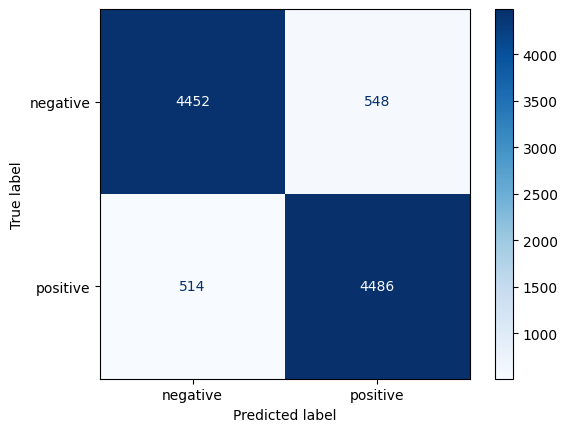

In [35]:
classes=np.unique(labels)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### TF-IDF

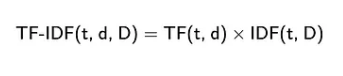

* Term Frequency(TF):

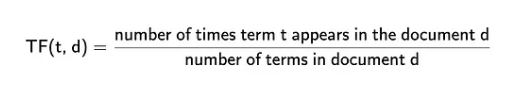

* Inverse Document Frequency (IDF):

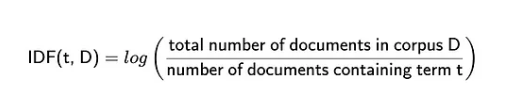

In [56]:
vectorizer_tfidf=TfidfVectorizer()
X_tfidf=vectorizer_tfidf.fit_transform(texts_punt)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42,stratify=labels)

In [40]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      5000
    positive       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



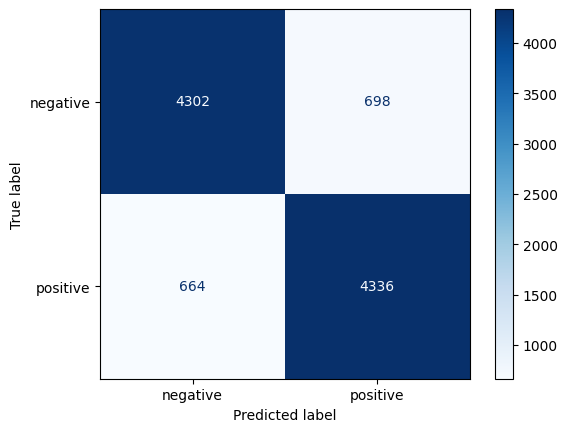

In [58]:
classes=np.unique(labels)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Word2Vec

In [44]:
word2vec_model=Word2Vec(X_text, min_count=1)

In [45]:
word2vec_model.wv.index_to_key

[',',
 '.',
 "'s",
 'movie',
 'film',
 ')',
 '(',
 "n't",
 '``',
 "''",
 'one',
 '!',
 'like',
 '?',
 'good',
 'would',
 'even',
 'time',
 'really',
 'see',
 'story',
 "'",
 '...',
 'well',
 ':',
 '-',
 'much',
 'could',
 'get',
 'people',
 'bad',
 'great',
 'also',
 'first',
 'made',
 'way',
 'make',
 'movies',
 'characters',
 'think',
 '*',
 'watch',
 'character',
 'films',
 'many',
 ';',
 'seen',
 'two',
 'never',
 'love',
 'acting',
 'plot',
 'show',
 'best',
 'know',
 'little',
 'life',
 'ever',
 'better',
 'man',
 'end',
 'scene',
 'still',
 'say',
 'scenes',
 '--',
 "'ve",
 'something',
 'go',
 "'m",
 'back',
 'thing',
 'watching',
 'real',
 'actors',
 'though',
 'years',
 'funny',
 'another',
 'actually',
 'nothing',
 'makes',
 'work',
 'find',
 'look',
 'director',
 'lot',
 'going',
 'new',
 'every',
 'old',
 'part',
 '&',
 "'re",
 'us',
 'cast',
 'things',
 'world',
 'want',
 'quite',
 'got',
 'pretty',
 'around',
 'seems',
 'ca',
 'young',
 'take',
 'however',
 'enough',
 'f

In [46]:
def get_embedding(text):
  doc=[word for word in text if word in word2vec_model.wv.index_to_key]
  return np.mean(word2vec_model.wv[doc],axis=0)

In [47]:
X_word2vec=np.array([get_embedding(text) for text in X_text])

Filtrar los embedding nulos

In [49]:
X_word2vec=[e for e in X_word2vec if e is not None]
labels=[l for i,l in enumerate(labels) if X_word2vec[i] is not None]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, labels, test_size=0.2, random_state=42,stratify=labels)

In [51]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      5000
    positive       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



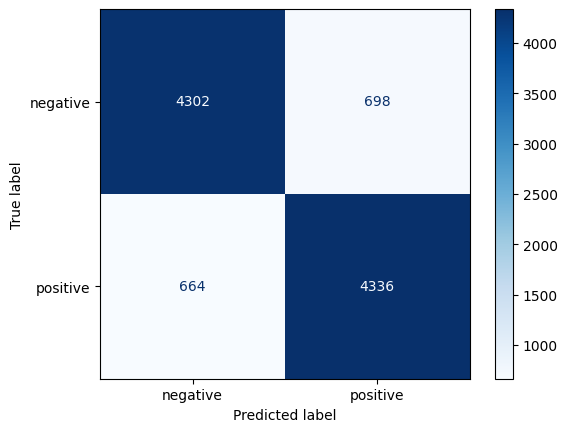

In [55]:
classes=np.unique(labels)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()